# 1. Perceptron
Biological neuron has dendrites to receive signals, a cell body to process them and an axon/axon terminal to transfer signals out to other neurons. Similarly **artificial neuron** (**perceptron**) has multiple input channels to accept training samples represented as a vector and a processing stage where the weights are adjusted such that the output error (actual vs. predicted) is minimized. Then the result is fed into an **activation function** to produce output, for example a classification label. Activation function for a classification problem is a threshold cut-off above which class is **1** else **0**.

## Exercise 1: Perceptron

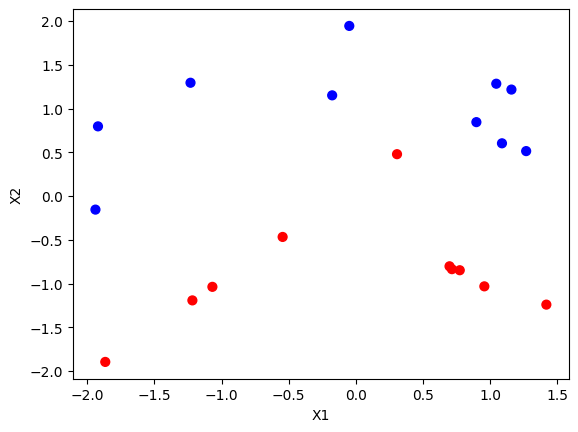

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Import sklearn.linear_model.perceptron
from sklearn.linear_model import Perceptron

# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, weights = [0.5, 0.5])

# Plot the data
colormap = np.array(['r', 'b'])
plt.scatter(X[:,0], X[:,1], c = colormap[y], s = 40)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [7]:
# Create the model
# If early_stopping=True, a part of training data is used as validation data (default=0.1)
#clf = Perceptron(max_iter = 100, tol = 0.20, verbose = 0, fit_intercept = True, eta0 = 0.002, early_stopping = True, random_state = 2024)
# clf = Perceptron(max_iter = 100, tol = 0.20, verbose = 0, fit_intercept = True, eta0 = 0.002, early_stopping = True, random_state = 2017)
#clf = Perceptron(max_iter = 100, tol = 0.20, verbose = 0, fit_intercept = True, eta0 = 0.002, early_stopping = True, random_state = 2019)
clf = Perceptron(max_iter = 100, tol = 0.20, verbose = 0, fit_intercept = True, eta0 = 0.002, early_stopping = True, random_state = 777)
clf.fit(X, y)

# Print the results
print ('Prediction:' + '\t' + str(clf.predict(X)))
print ('Actual:' + '\t\t' + str(y))
print ('Accuracy:' + '\t' + str(clf.score(X, y)*100) + '%')

# Output the values (coef_ - weights assigned to the features, intercept_ - constant in decision function)
print ('\nX1 Coefficient:' + str(clf.coef_[0,0]))
print ('X2 Coefficient:' + str(clf.coef_[0,1]))
print ('Intercept:' + str(clf.intercept_))

Prediction:	[1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1]
Actual:		[1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1]
Accuracy:	95.0%

X1 Coefficient:-0.0006360650748062687
X2 Coefficient:0.004464396880731701
Intercept:[0.]


**Plot the decision boundary.**

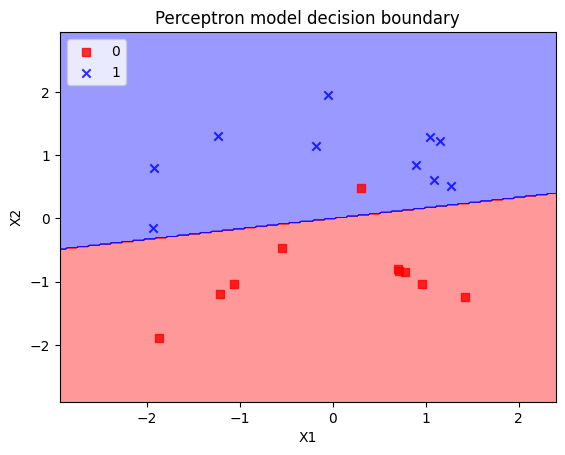

In [3]:
def plot_decision_regions(X, y, classifier):
    h = 0.02  # Step size in the mesh
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y=X[y == cl, 1],
                    alpha = 0.8, color = cmap(idx),
                    marker = markers[idx], label = cl)

# Plot the decision boundary
plot_decision_regions(X, y, classifier = clf)
plt.title('Perceptron model decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

**Questions:**
1. Based on the documentation available on the website: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html explain the meaning of the parameters used to create the Perceptron model.
2. Perform experiments for various observation distributions. To do so, use the parameter **random_state** equal to **2017**, **2019** and **777**, respectively. Comment on the results obtained and present the conclusions you can draw from the experiment.

**Answers:**

# 2. Multilayer perceptron using Scikit Learn

## Exercise 2: Handwritten digits
We’ll be using the well known MNIST database of handwritten digits, which consists of approximately 70,000 total samples of handwritten grayscale digit (0-9) images. Each image is of size 8x8 and its intensity level varies from 0-255. Accompanying label integer is 0 to 9 for 60,000 images. The remaining images have no label (they create test data set).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml

We have 1797 samples


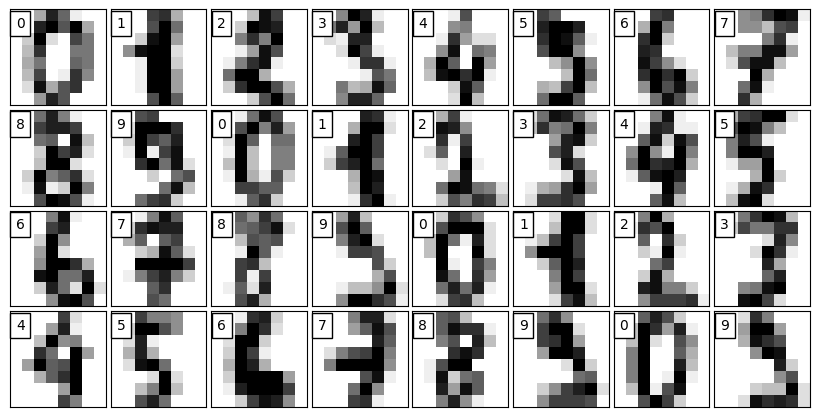

In [9]:
# Load data
digits = load_digits()
print('We have %d samples' %len(digits.target))

# Plot the first 32 samples to get a sense of the data
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1, xticks = [], yticks = [])
    ax.imshow(digits.images[i],  cmap = plt.cm.gray_r)
    ax.text(0, 1, str(digits.target[i]), bbox = dict(facecolor = 'white'))

Number of samples in training set: 1437
Number of samples in test set: 360

Training set score: 0.964509
Test set score: 0.950000


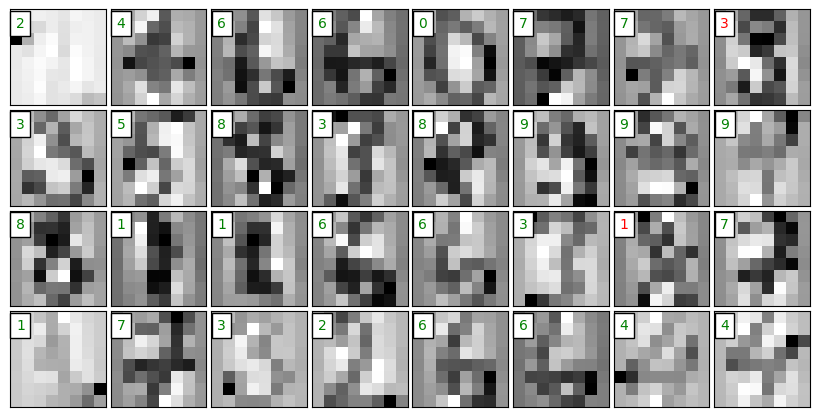

In [15]:
# Split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)
print ('Number of samples in training set: %d' %(len(y_train)))
print ('Number of samples in test set: %d' %(len(y_test)))

# Standardise data, and fit only to the training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create the model
# If early_stopping=True, a part of training data is used as validation data (default=0.1)
# mlp = MLPClassifier(hidden_layer_sizes = (100), activation = 'logistic', max_iter = 100, early_stopping = True)
# mlp = MLPClassifier(hidden_layer_sizes = (50), activation = 'logistic', max_iter = 100, early_stopping = True)
# mlp = MLPClassifier(hidden_layer_sizes = (200), activation = 'logistic', max_iter = 100, early_stopping = True)

# mlp = MLPClassifier(hidden_layer_sizes = (100), activation = 'relu', max_iter = 100, early_stopping = True)
# mlp = MLPClassifier(hidden_layer_sizes = (100), activation = 'tanh', max_iter = 100, early_stopping = True)

# mlp = MLPClassifier(hidden_layer_sizes = (100), activation = 'logistic', max_iter = 300, early_stopping = True)
# mlp = MLPClassifier(hidden_layer_sizes = (100), activation = 'logistic', max_iter = 200, early_stopping = True)
# mlp = MLPClassifier(hidden_layer_sizes = (100), activation = 'logistic', max_iter = 50, early_stopping = True)



# Train the classifier with the traning data
mlp.fit(X_train, y_train)

print ('\nTraining set score: %f' % mlp.score(X_train, y_train))
print ('Test set score: %f' % mlp.score(X_test, y_test))

# Predict results from the test data
X_test_predicted = mlp.predict(X_test)

fig = plt.figure(figsize = (8, 8))  # Figure size in inches
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

# Plot the first 32 predicted digits: each image is 8x8 pixels
for i in range(32):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap = plt.cm.gray_r)

    # Label the image with the target value
    # green - correct classification, red - incorrect classification
    if X_test_predicted[i] == y_test[i]:
        ax.text(0, 1, X_test_predicted[i], color = 'green', bbox = dict(facecolor = 'white'))
    else:
        ax.text(0, 1, X_test_predicted[i], color = 'red', bbox = dict(facecolor = 'white'))

**Questions:**
1. Comment on the results obtained. What mistakes did the classifier make?
2. Run experiments for 3 different values of each of the following MLP classifier parameters: **hidden_layer_sizes**, **activation**, **max_iter**. Based on the experiments, determine the optimal values for each parameter. Find the acceptable values of the parameters in the documentation available on the website: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.

**Answers:**

## Exercise 3: PIMA diabetes

In [38]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab11/Diabetes.csv')

X = df.iloc[:,0:8].values  # Independent variables
y = df['class'].values     # Dependent variable
X.shape

# The default value for the test_size parameter is 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Standardazie data, fit only to the training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create the model, we use 3 hidden layers with 30 hidden neurons each
'''
early_stopping -> parameter used to terminate training when validation score is not improving.
If set to true, it will automatically set aside 10% of training data as validation and terminate
training when validation score is not improving by at least tol during n_iter_no_change epochs.
tol --> tolerance for the optimization, default=1e-4.
n_iter_no_change-> maximum number of consecutive epochs over which the tol is not improved.
'''
# mlp = MLPClassifier(hidden_layer_sizes = (30, 30, 30), early_stopping = True)
# mlp = MLPClassifier(hidden_layer_sizes = (30, 30, 30), activation = "logistic", max_iter = 200, early_stopping = True)
mlp = MLPClassifier(hidden_layer_sizes = (30, 30, 30), activation = "relu", max_iter = 300, early_stopping = True)

mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

print ('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
print ('\nClassification report:\n', classification_report(y_test, predictions))




loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
print(f"\nTest Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Confusion Matrix:
 [[105  23]
 [ 36  28]]

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       128
           1       0.55      0.44      0.49        64

    accuracy                           0.69       192
   macro avg       0.65      0.63      0.63       192
weighted avg       0.68      0.69      0.68       192

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.6796 

Test Loss: 0.6812968254089355
Test Accuracy: 0.6666666865348816


**Questions:**
1. What is the overall classification accuracy (ACC)?
2. What is the classification sensitivity and specificity? How did you determine these values?
3. In your opinion, does the relationship between sensitivity and specificity benefit the patient from a medical point of view? Justify your answer.
4. Run experiments to improve sensitivity and specificity. To do so, use different values for the **activation** and **max_iter** parameters of the MLP classifier. Determine the optimum values for these parameters.

**Answers:**

## Exercise 4: Breast cancer

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

# 569 data points with 30 features
cancer['data'].shape

X = cancer['data']
y = cancer['target']

# The default value for the test_size parameter is 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Standardazie data, fit only to the training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create the model, we use 3 hidden layers with 30 hidden neurons each
# If early_stopping=True, a part of training data is used as validation data (default=0.1)
# mlp = MLPClassifier(hidden_layer_sizes = (30, 30, 30), early_stopping = True)
# mlp = MLPClassifier(hidden_layer_sizes = (50, 50, 50), early_stopping = True)
mlp = MLPClassifier(hidden_layer_sizes = (100, 100), early_stopping = True)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

print ('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
print ('\nClassification Report:\n', classification_report(y_test, predictions))

Confusion Matrix:
 [[47  5]
 [ 0 91]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        52
           1       0.95      1.00      0.97        91

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



**Questions:**
1. Run the above code several times and observe the contents of the confusion matrix. How do you justify the different results obtained each time you run this code?
2. Run experiments with different numbers of hidden layers and different numbers of neurons in these layers. What conclusions did these experiments lead you to?

**Answers:**

# 3. Multilayer perceptron using Keras

## Exercise 5: Handwritten digits

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model
from keras.utils import to_categorical
from keras import backend as K
from keras.callbacks import EarlyStopping

from IPython.display import SVG, display
from keras.utils import model_to_dot, plot_model

In [28]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

nb_classes = 10 # Class size
# Flatten 28*28 images to a 784 vector for each image
input_unit_size = 28 * 28

X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test  = X_test.reshape(X_test.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# Scale the values (dividing by 255)
X_train /= 255
X_test  /= 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
# One-hot representation
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
60000 train samples
10000 test samples


In [30]:
# Create model
model = Sequential()
model.add(Dense(input_unit_size,
                input_dim = input_unit_size,
                activation = 'relu'))
model.add(Dense(nb_classes,
                activation = 'softmax'))

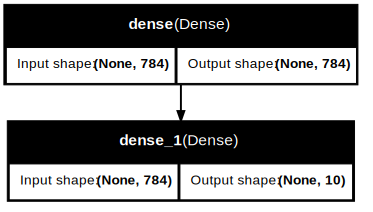

In [31]:
# Compile model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

SVG(model_to_dot(model, show_shapes = True, show_layer_names = True, dpi = 70).create(prog = 'dot', format = 'svg'))

In [32]:
# Model training
# 10% of the training data will be used for validation
model.fit(X_train, y_train,
          validation_split = 0.1,
          epochs = 5,
          batch_size = 500,
          verbose = 1)

# Final evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test, verbose = 1)
print(f"\nTest Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8092 - loss: 0.7025 - val_accuracy: 0.9580 - val_loss: 0.1649
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.9490 - loss: 0.1787 - val_accuracy: 0.9695 - val_loss: 0.1162
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9665 - loss: 0.1229 - val_accuracy: 0.9725 - val_loss: 0.0982
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9746 - loss: 0.0903 - val_accuracy: 0.9757 - val_loss: 0.0858
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9814 - loss: 0.0674 - val_accuracy: 0.9797 - val_loss: 0.0733
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.0906

Test Loss: 0.0791497752070427
Test Accuracy: 0.9753000140190125


**Questions:**
1. What changes would you make to the code responsible for creating and compiling the model if you were solving a binary classification task?
2. An MLP model can be built using the Scikit Learn library or Keras. What are the main differences between these two approaches?

**Answers:**

## Exercise 6: PIMA diabetes

In [33]:
import pandas as pd

# Load pima indians dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab11/Diabetes.csv')

# Split into input (X) and output (y) variables
X = dataset.iloc[:,0:8].values  # Independent variables
Y = dataset['class'].values     # Dependent variable

# Evaluate the model by splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [34]:
# Create model
model = Sequential()
model.add(Dense(12,
                input_dim = 8,
                kernel_initializer = 'uniform',
                activation = 'relu'))
model.add(Dense(1,
                kernel_initializer = 'uniform',
                activation = 'sigmoid'))

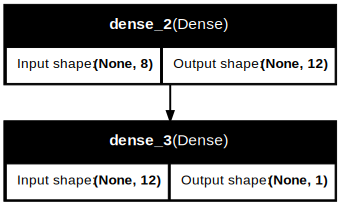

In [35]:
# Compile model
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

SVG(model_to_dot(model, show_shapes = True, show_layer_names = True, dpi = 70).create(prog = 'dot', format = 'svg'))

In [36]:
# Model training
# 10% of the training data will be used for validation
model.fit(X_train, Y_train, validation_split = 0.1, epochs = 5,  batch_size = 10, verbose = 1)

# Final evaluation of the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose = 1)
print(f"\nTest Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6339 - loss: 0.7168 - val_accuracy: 0.6852 - val_loss: 0.6680
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6530 - loss: 0.6678 - val_accuracy: 0.6667 - val_loss: 0.6693
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6605 - loss: 0.6487 - val_accuracy: 0.6667 - val_loss: 0.6656
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6696 - loss: 0.6382 - val_accuracy: 0.6481 - val_loss: 0.6616
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6357 - loss: 0.6547 - val_accuracy: 0.6481 - val_loss: 0.6591
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6608 

Test Loss: 0.6510879993438721
Test Accuracy: 0.6406926512718201


**Questions:**
1. Given a PIMA diabetes dataset, compare the accuracy of a model built using Scikit Learn with a model built using Keras.
2. Based on the experiments, select the model parameters to improve its accuracy.
3. Which dataset was used to evaluate the model? What do you think of this way of evaluating the model?

**Answers:**

1. In this case the scikit-Learn model performs slightly better than keras model
The result with scikit-learn: Test Loss: 0.6812968254089355
Test Accuracy: 0.6666666865348816
the result with keras - Test Loss: 0.6510879993438721
Test Accuracy: 0.6406926512718201
2. We can try with different hidden laters and neuron numbers, change the activation function, optimizers and learning rate.
3. We used PIMA Indians Diabetes Dataset, it contains information about medical record data for predicting whether a patient has diabetes or not based on factors like age, BMI, insulin levels, and glucose concentrations. The model was evaluated using train-test split with 70-30%. This is a good evaluation method, but can be improved with k-cross-validation.

